In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading The Dataset

In [2]:
df = pd.read_csv('/kaggle/input/exploratory-data-analysis-on-netflix-data/netflix_titles_2021.csv')

In [3]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


# Checking Type

In [4]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Creating Bar Plot

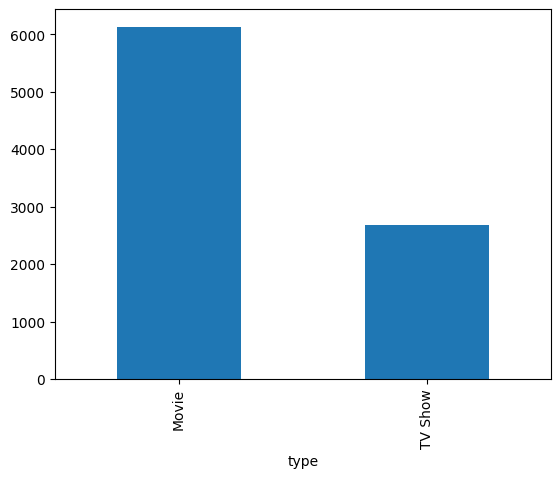

In [6]:
df['type'].value_counts().plot(kind = 'bar')
plt.show()

In [7]:
genre_counts = df['listed_in'].value_counts()
genre_counts

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

In [8]:
df.shape

(8807, 12)

# Checking None Values

In [9]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Adjust Data types and Filling Missing Values:

**The Following Do Not Require Any Fills:**

* type
* show_id
* title
* relears_year
* show_id
* listed_in
* description

**The Following Are the Missing Data:**

* duration
* rating 
* date_added
* cast
* country
* director

# Updating The date_added with int

In [10]:
df['date_added'] = df['date_added'].str.strip()

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [12]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


# Handling Missing Values

In [13]:
df.fillna({'rating':'Unavalable', 'cast':'Unavalable', 'country':'Unavalable', 'director':'Unavalable'}, inplace = True)


In [14]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

For Null in date_added, missing date_added is to be substitude with the most recent date from date_added. This is because the netflix has the tendency to add more content over time. 

In [15]:
df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavalable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavalable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unavalable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unavalable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unavalable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unavalable,Igor Dmitriev,Unavalable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unavalable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unavalable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unavalable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unavalable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [16]:
most_recent_data = df['date_added'].max()
df.fillna({'date_added': most_recent_data}, inplace = True)

In [17]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavalable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unavalable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [18]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [19]:
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


# Additional Data Cleaning
**Daurations data Input Error:**

The missing durations are all movies by Louis C.K. Normally, we would likely fill the duration of movies from the table. In this case it appears that the actual duration was input into the rating column, so one solution is to move the rating data into the duration and make the rating information 'Unavailable' like the other nulls.

In [20]:
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In the **Above Code** you can see there is **NaN in the duration** column and the **time/min are in the rating column** it shouldn't be there, so what am gonna do am gonna **shift the rating values into the duration column**, and in the **rating column we will put Unavailable**

**We have to make sure that there is no content with the same director to avoid accidental overwriting**

In [21]:
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [22]:
df.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

# Count VS Type Of Show

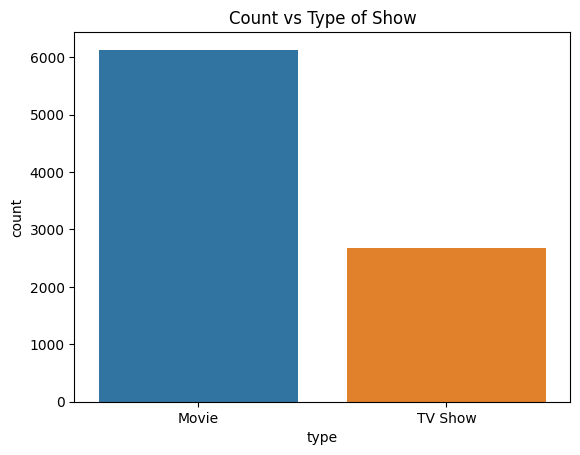

In [23]:
sns.countplot(x = 'type', data = df)
plt.title('Count vs Type of Show')
plt.show()

In [24]:
df['country'].value_counts().head(10)

country
United States     2818
India              972
Unavalable         831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

# Country Wise Content on Netflix

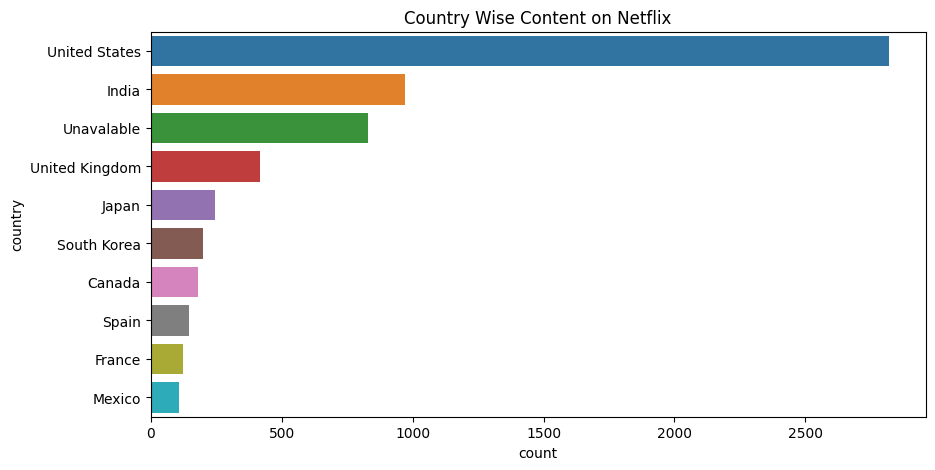

In [25]:
plt.figure(figsize = (10, 5))
sns.countplot(y = 'country', order = df['country'].value_counts().index[0:10], data = df)
plt.title('Country Wise Content on Netflix')
plt.show()

# Year Wise Content On Netflix

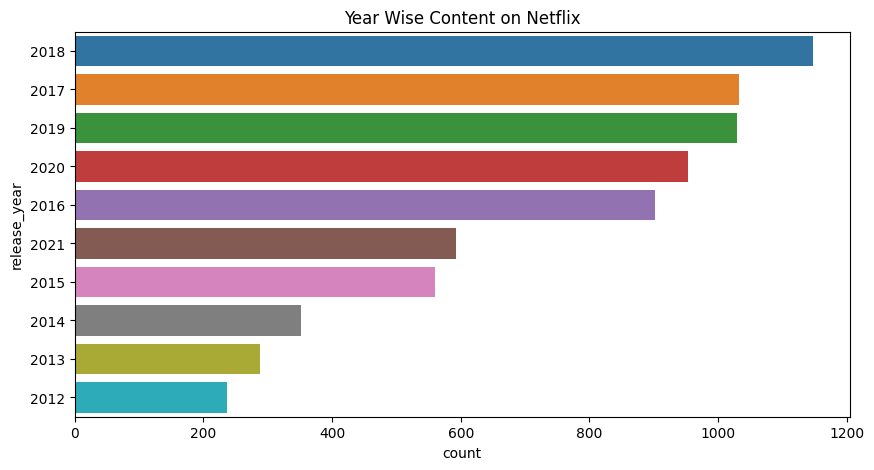

In [26]:
plt.figure(figsize = (10, 5))
sns.countplot(y = 'release_year', order = df['release_year'].value_counts().index[0:10], data = df)
plt.title('Year Wise Content on Netflix')
plt.show()

In [27]:
movie_countries = df[df['type'] == 'Movie']
tv_show_countris = df[df['type'] == 'TV Show']

# Top 10 Countries Producing Movies On Netflix

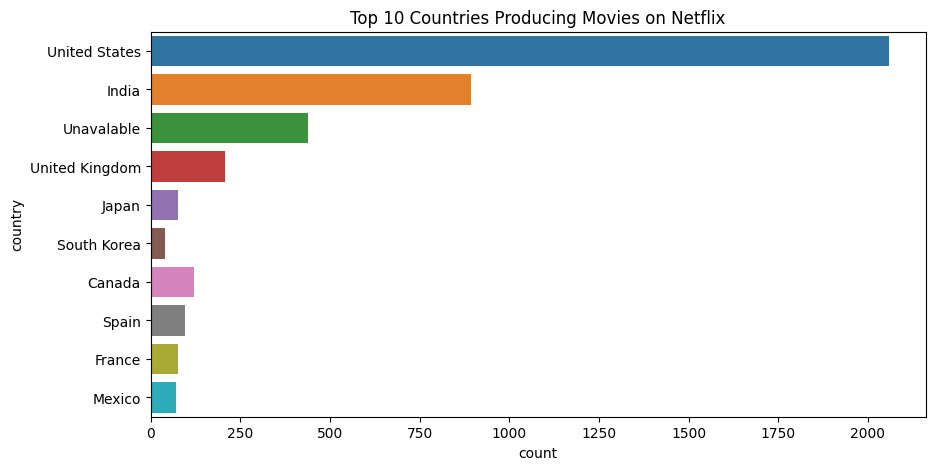

In [28]:
plt.figure(figsize = (10, 5))
sns.countplot(y = 'country', order = df['country'].value_counts().index[0:10], data = movie_countries)
plt.title('Top 10 Countries Producing Movies on Netflix')
plt.show()

# Top 10 Countries Producing TV Shows On Netflix

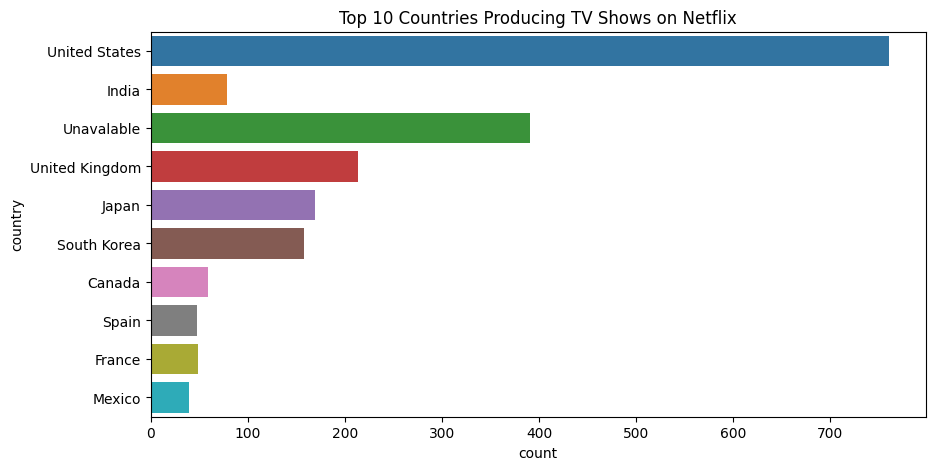

In [29]:
plt.figure(figsize = (10, 5))
sns.countplot(y = 'country', order = df['country'].value_counts().index[0:10], data = tv_show_countris)
plt.title('Top 10 Countries Producing TV Shows on Netflix')
plt.show()

In [30]:
df.rating.value_counts().head(10)

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

# Rating Of Show On Netflix VS Counts

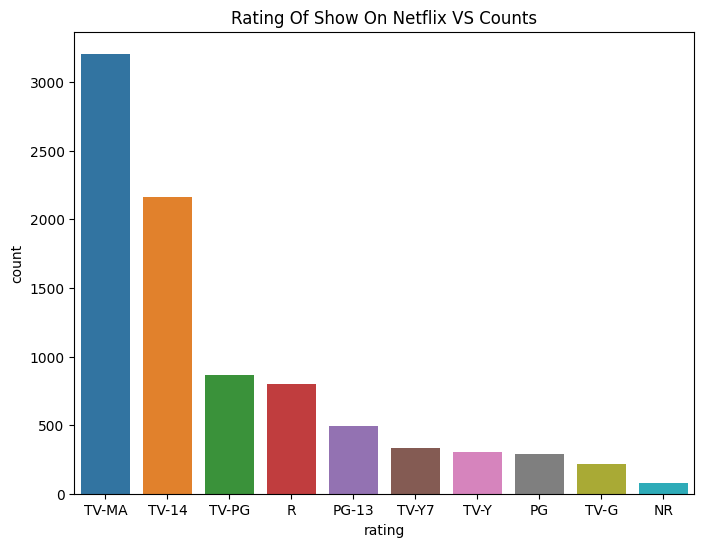

In [31]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'rating', order = df['rating'].value_counts().index[0:10], data = df)
plt.title('Rating Of Show On Netflix VS Counts')
plt.show()

In **Above** output you can see that **TV-MA and TV-14** both Show have the most ratings

In [32]:
df.release_year.value_counts()[:20]

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
Name: count, dtype: int64

In the **Above Output** you can see that in year **2018 | 1147 Movies and TV Shows** are produced on Netflix and so on.

# Content Release in Years On Netflix VS Count

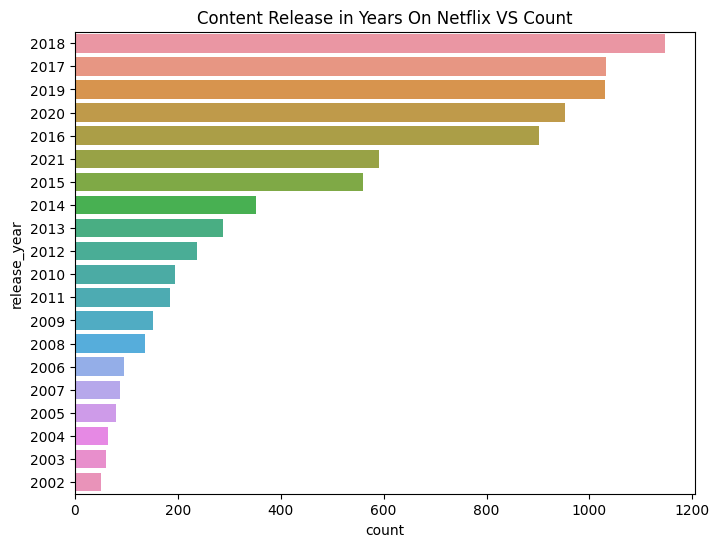

In [33]:
plt.figure(figsize = (8, 6))
sns.countplot(y = 'release_year', order = df['release_year'].value_counts().index[0:20], data = df)
plt.title('Content Release in Years On Netflix VS Count')
plt.show()

# Popular Genres Analysis

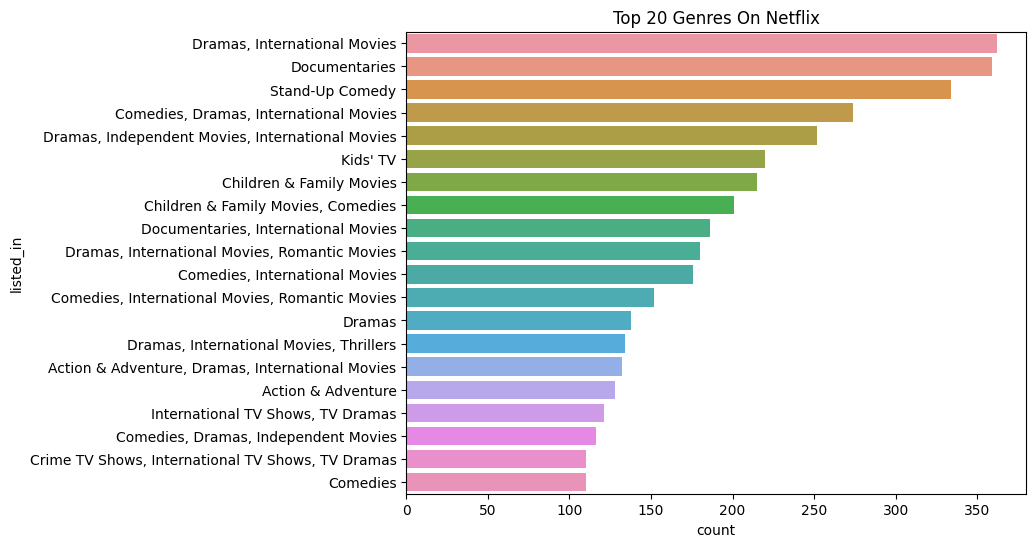

In [34]:
plt.figure(figsize = (8, 6))
sns.countplot(y = 'listed_in', order = df['listed_in'].value_counts().index[0:20], data = df)
plt.title('Top 20 Genres On Netflix')
plt.show()

# Summary

* Netflix has more Movies Than TV Shows.
* Most Movies and TV Shows are produced in the US, followed by India which has made the 2nd most number of Movies on Netflix.
* Most of the Content on Netflix (Movies and TV Shows combined) for Mature.
* 2018 is the year in which Netflix released a lot more content as compared to other years
* International Movies And Dramas are The Most Genres on Netflix